# Loading important liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [2]:
data = pd.read_excel("Tweet_NFT.xlsx")

# Exploratory Data Analysis

In [3]:
data.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762.0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763.0,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765.0,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766.0,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767.0,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community


In [4]:
data.describe()

,id
count,1.274530e+05
mean,1.297300e+06
std,6.301816e+04
min,1.212762e+06
25%,1.244749e+06
50%,1.276623e+06
75%,1.346851e+06
max,2.309537e+06


In [5]:
data.dtypes

id                  float64
tweet_text           object
tweet_created_at     object
tweet_intent         object
dtype: object

In [6]:
data.isnull().sum()

id                      0
tweet_text              0
tweet_created_at        0
tweet_intent        31089
dtype: int64

we have missing value in tweet_intent  column in our dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127453 entries, 0 to 127452
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                127453 non-null  float64
 1   tweet_text        127453 non-null  object 
 2   tweet_created_at  127453 non-null  object 
 3   tweet_intent      96364 non-null   object 
dtypes: float64(1), object(3)
memory usage: 3.9+ MB


In [8]:
data["tweet_intent"].value_counts()

Community         41510
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
Name: tweet_intent, dtype: int64

# Data Visualization

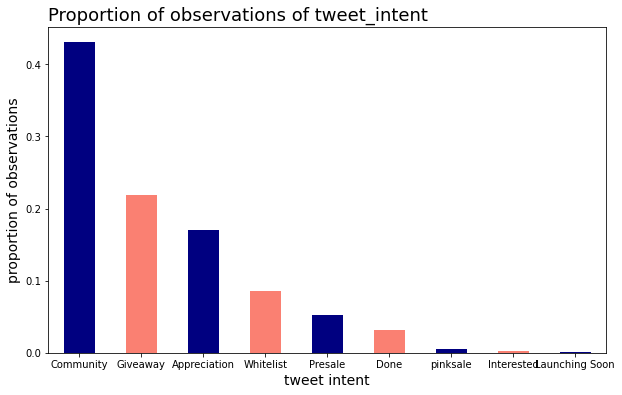

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# proportion of observation of each class

prop_response = data["tweet_intent"].value_counts(normalize=True)

# create barplot showing the percentage of label
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['navy','salmon'])

# set titles
ax.set_title('Proportion of observations of tweet_intent',
             fontsize=18, loc='left')
ax.set_xlabel('tweet intent',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')

In [10]:
data['length'] = data['tweet_text'].apply(len)

In [11]:
data.head()

,id,tweet_text,tweet_created_at,tweet_intent,length
0,1212762.0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community,483
1,1212763.0,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway,300
2,1212765.0,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation,95
3,1212766.0,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community,284
4,1212767.0,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community,272


In [12]:
data["length"].describe()

count    127453.000000
mean        179.637372
std          98.121174
min          12.000000
25%          99.000000
50%         154.000000
75%         276.000000
max        1300.000000
Name: length, dtype: float64

(array([1.0957e+04, 3.9210e+04, 1.7091e+04, 1.2436e+04, 1.3091e+04,
        2.6694e+04, 6.0480e+03, 1.4400e+03, 2.4800e+02, 1.1800e+02,
        3.8000e+01, 2.3000e+01, 1.0000e+01, 1.3000e+01, 2.0000e+01,
        8.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  12.  ,   63.52,  115.04,  166.56,  218.08,  269.6 ,  321.12,
         372.64,  424.16,  475.68,  527.2 ,  578.72,  630.24,  681.76,
         733.28,  784.8 ,  836.32,  887.84,  939.36,  990.88, 1042.4 ,
        1093.92, 1145.44, 1196.96, 1248.48, 1300.  ]),
 <BarContainer object of 25 artists>)

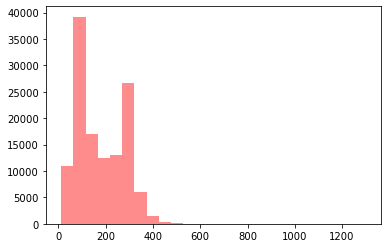

In [13]:
plt.hist(data['length'], bins=25, alpha=0.45, color='red')

<AxesSubplot:xlabel='tweet_intent', ylabel='length'>

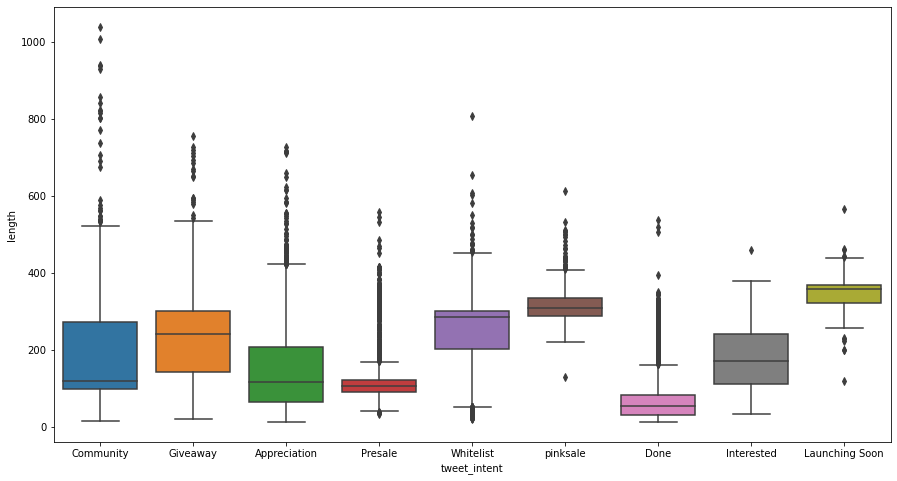

In [14]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x=data.tweet_intent, y=data.length)

# Text Pre-processing

In [15]:
data["tweet_text"].iloc[5]

'ðŸŽ‰ Just registered for the saphire on @PREMINT_NFT! https://t.co/lNIXaPFL4j'

# 1. Removing url

In [16]:
import re
def clean_url(review_text):
    return re.sub(r'http\S+', '', review_text)

data['tweet_text'] = data['tweet_text'].apply(clean_url)

In [17]:
data["tweet_text"].iloc[5]

'ðŸŽ‰ Just registered for the saphire on @PREMINT_NFT! '

# 2.Removing all irrelevant characters (Numbers and Punctuation)

In [18]:
def clean_non_alphanumeric(review_text):
    return re.sub('[^a-zA-Z]',' ',review_text)

data['tweet_text'] = data['tweet_text'].apply(clean_non_alphanumeric)

In [19]:
data["tweet_text"].iloc[5]

'     Just registered for the saphire on  PREMINT NFT  '

# 3.Convert all characters into lowercase

In [20]:
def clean_lowercase(review_text):
    return str(review_text).lower()
data['tweet_text'] = data['tweet_text'].apply(clean_lowercase)

In [21]:
data["tweet_text"].iloc[5]

'     just registered for the saphire on  premint nft  '

# 4.tokenization

In [22]:
import nltk
from nltk.tokenize import word_tokenize

In [23]:
import string
from nltk.corpus import stopwords

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
def clean_tokenization(review_text):
    return word_tokenize(review_text)
data['tweet_text'] = data['tweet_text'].apply(clean_tokenization)

In [26]:
data["tweet_text"].iloc[5]

['just', 'registered', 'for', 'the', 'saphire', 'on', 'premint', 'nft']

Result: As we can see the string has been changed into tokens, that has been stored in the form of ‘list of string

In [27]:
data.head(5)

,id,tweet_text,tweet_created_at,tweet_intent,length
0,1212762.0,"[crypto, brody, ecology, moonrunnersnft, itsuk...",2022-08-06T16:56:36.000Z,Community,483
1,1212763.0,"[need, sick, character, art, x, d, art, artist...",2022-08-06T16:56:36.000Z,Giveaway,300
2,1212765.0,"[the, hulk, nft, inagotchinft, tesla, killabea...",2022-08-06T16:56:35.000Z,Appreciation,95
3,1212766.0,"[cryptobatznft, darekbtw, the, first, project,...",2022-08-06T16:56:35.000Z,Community,284
4,1212767.0,"[sashadysonn, the, first, project, in, crypto,...",2022-08-06T16:56:34.000Z,Community,272


# 5.Removing Stopwords

In [28]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
stop_words = set(stopwords.words('english'))
def clean_stopwords(token):
    return [item for item in token if item not in stop_words]

data['tweet_text'] = data['tweet_text'].apply(clean_stopwords)

In [30]:
data["tweet_text"].iloc[5]

['registered', 'saphire', 'premint', 'nft']

# 6.Stemming and Lemmatization

 stemming

In [31]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
def clean_stem(token):
    return [stemmer.stem(i) for i in token]

data['tweet_text'] = data['tweet_text'].apply(clean_stem)

lemmitization

In [32]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

def clean_lemmatization(token):
    return [lemma.lemmatize(word=w, pos='v') for w in token]
data['tweet_text'] = data['tweet_text'].apply(clean_lemmatization)

In [33]:
def clean_length(token):
    return [i for i in token if len(i) > 2]
data['tweet_text'] = data['tweet_text'].apply(clean_length)

In [34]:
data["tweet_text"].iloc[5]

['regist', 'saphir', 'premint', 'nft']

# Convert the list of tokens into back to the string

In [35]:
def convert_to_string(listReview):
    return ' '.join(listReview)

data['tweet_text'] = data['tweet_text'].apply(convert_to_string)

In [36]:
data.head()

,id,tweet_text,tweet_created_at,tweet_intent,length
0,1212762.0,crypto brodi ecolog moonrunnersnft itsukinft t...,2022-08-06T16:56:36.000Z,Community,483
1,1212763.0,need sick charact art art artist artist anim i...,2022-08-06T16:56:36.000Z,Giveaway,300
2,1212765.0,hulk nft inagotchinft tesla killabearsnft elon...,2022-08-06T16:56:35.000Z,Appreciation,95
3,1212766.0,cryptobatznft darekbtw first project crypto mo...,2022-08-06T16:56:35.000Z,Community,284
4,1212767.0,sashadysonn first project crypto move earn ast...,2022-08-06T16:56:34.000Z,Community,272


# vectorization

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
cv = CountVectorizer().fit(data['tweet_text'])

In [39]:
print(len(cv.vocabulary_))

114053


In [40]:
text_bag = cv.transform(data['tweet_text'])

# TF - IDF

In [41]:
tfidf = TfidfTransformer().fit(text_bag)
text_tfidf = tfidf.transform(text_bag)
print(text_tfidf.shape)

(127453, 114053)


# Filling the Missing Values – Imputation

In [42]:
data = data.drop('length', axis=1)

In [43]:
data.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762.0,crypto brodi ecolog moonrunnersnft itsukinft t...,2022-08-06T16:56:36.000Z,Community
1,1212763.0,need sick charact art art artist artist anim i...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765.0,hulk nft inagotchinft tesla killabearsnft elon...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766.0,cryptobatznft darekbtw first project crypto mo...,2022-08-06T16:56:35.000Z,Community
4,1212767.0,sashadysonn first project crypto move earn ast...,2022-08-06T16:56:34.000Z,Community


In [44]:
updated_df = data
updated_df['tweet_intent'] = updated_df['tweet_intent'].fillna(updated_df['tweet_intent'].mode())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127453 entries, 0 to 127452
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                127453 non-null  float64
 1   tweet_text        127453 non-null  object 
 2   tweet_created_at  127453 non-null  object 
 3   tweet_intent      96364 non-null   object 
dtypes: float64(1), object(3)
memory usage: 3.9+ MB


In [45]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['tweet_intent']= label_encoder.fit_transform(data['tweet_intent'])
data.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762.0,crypto brodi ecolog moonrunnersnft itsukinft t...,2022-08-06T16:56:36.000Z,1
1,1212763.0,need sick charact art art artist artist anim i...,2022-08-06T16:56:36.000Z,3
2,1212765.0,hulk nft inagotchinft tesla killabearsnft elon...,2022-08-06T16:56:35.000Z,0
3,1212766.0,cryptobatznft darekbtw first project crypto mo...,2022-08-06T16:56:35.000Z,1
4,1212767.0,sashadysonn first project crypto move earn ast...,2022-08-06T16:56:34.000Z,1


In [46]:
updated_df = data
updated_df['tweet_intent'] = updated_df['tweet_intent'].fillna(updated_df['tweet_intent'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127453 entries, 0 to 127452
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                127453 non-null  float64
 1   tweet_text        127453 non-null  object 
 2   tweet_created_at  127453 non-null  object 
 3   tweet_intent      127453 non-null  int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 3.4+ MB


# training and testing of data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data['tweet_text'], data['tweet_intent'], test_size=0.25, random_state=42)

In [48]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [49]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [50]:
predictions = pipeline.predict(X_test)

In [51]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.62      0.87      0.72      2953
           1       0.93      0.83      0.88     11669
           2       0.48      0.97      0.64       388
           3       0.88      0.85      0.87      5456
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.85      0.98      0.91      1106
           7       0.57      0.96      0.72      1220
           8       0.00      0.00      0.00         0
           9       0.86      0.73      0.79      9072

    accuracy                           0.82     31864
   macro avg       0.52      0.62      0.55     31864
weighted avg       0.85      0.82      0.83     31864



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
